Libraries

In [1]:
library(tidyverse)
library(quanteda)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Package version: 1.4.3
Parallel computing: 2 of 4 threads used.
See https://quanteda.io for tutorials and examples.

Attaching package: ‘quanteda’

The following object is masked from ‘jupyter:irkernel’:

    View

The following object is masked from ‘package:utils’:

    View



Load the Data

In [2]:
tweets <- read_csv("../Data/English_tweets_labelled.csv")

#not enough English tweets
tweets <- filter(tweets, leader != 'Yves-François Blanchet')

tweets <- filter(tweets, INDG == 1)


── Column specification ────────────────────────────────────────────────────────
cols(
  date = col_datetime(format = ""),
  leader = col_character(),
  language = col_character(),
  tweet = col_character(),
  `NTL & GLBL LDRSP` = col_double(),
  `AFRD & ECON_INSEC` = col_double(),
  INDG = col_double(),
  `PLR, HM & IMM` = col_double(),
  `ENVIRO & ENRGY` = col_double()
)



In [3]:
head(tweets)

date,leader,language,tweet,NTL & GLBL LDRSP,AFRD & ECON_INSEC,INDG,"PLR, HM & IMM",ENVIRO & ENRGY
2019-09-11 19:00:11,Elizabeth May,en,"Hi Russell, our platform is not yet released, but directly addresses the #MMIW recommendations. I spoke to the centrality of #UNDRIP to all our policies at this AM's launch. #GPC https://t.co/t0g9C9a830",0,0,1,0,0
2019-09-13 00:39:56,Jagmeet Singh,en,"""We should move forward with respect and dignity."" Check out Jagmeet's commitment to building a respectful nation-to-nation relationship with Indigenous peoples: https://t.co/wCEA4jNkBW #firstdebate #elxn43",1,0,1,0,0
2019-09-13 01:34:33,Jagmeet Singh,en,"""At a basic level, we ensure that there is equal funding. We also ensure that there is clean drinking water, that there is access to quality homes. And we make sure that Indigenous people are treated as equal partners in decisions."" #firstdebate #elxn43 https://t.co/L6WjHhbh6S",0,1,1,0,1
2019-09-17 12:04:38,Elizabeth May,en,Thank you. The work of reconciliation and justice is core to our platform. #GPC #UNDRIP https://t.co/dmVF8A3MwL,0,0,1,0,0
2019-09-23 12:36:29,Elizabeth May,en,We have re-adjusted our platform budget to commit the $2 billion owed to First Nations kids. Thank you! #GPC @cblackst https://t.co/K32Hem6f9X,0,0,1,0,0
2019-09-23 15:23:54,Jagmeet Singh,en,"Absolutely. The people of Grassy Narrows First Nation have waited far too long for the help they need &amp; deserve. I've been to Grassy Narrows &amp; saw the impact this continues to have on the community. So, unequivocally yes, I am committed to #JusticeforGrassyNarrows. https://t.co/6cunKiE3GW",0,0,1,0,0


Clean the data

In [4]:
#Remove Punctuation and Symbols (still keeps hashtags)
tweets.tokens <- tokens(tweets$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

#send to uppercase
tweets.tokens <- tokens_toupper(tweets.tokens)

#remove stopwords
tweets.tokens <- tokens_select(tweets.tokens, c(stopwords(), 'AMP'), selection = "remove")

#bag of words
tweets.tokens.dfm <- dfm(tweets.tokens, tolower=FALSE)

Word cloud including tweets from all leaders

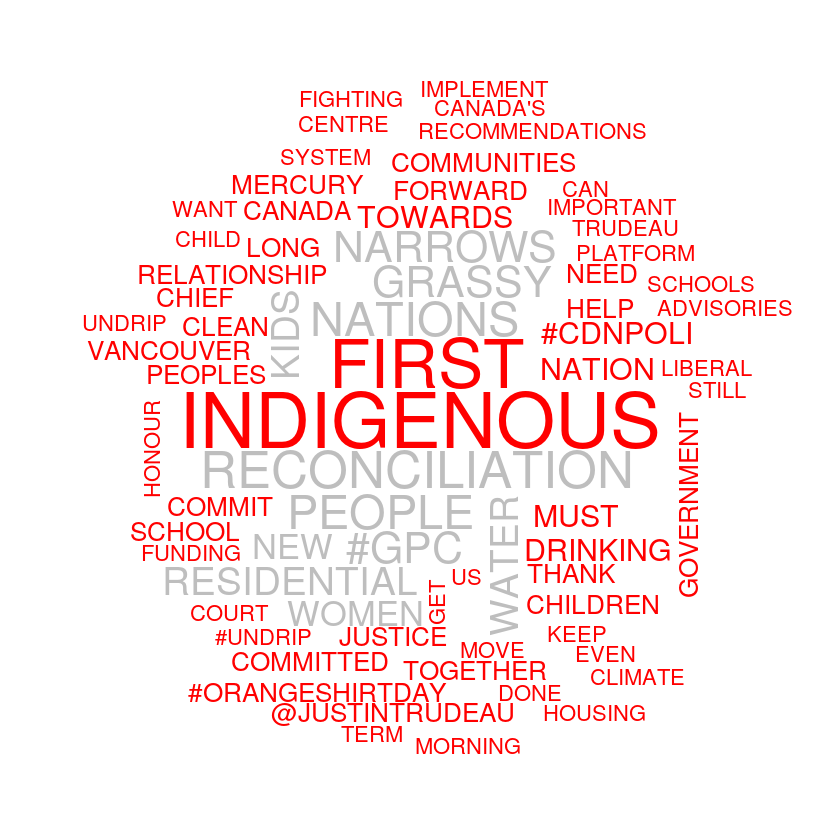

In [5]:
textplot_wordcloud(tweets.tokens.dfm, color=c("red", "gray", "red"), max_words=100)

In order to get wordclouds for each individual leader, split into 5 seperate dataframes

In [6]:
tweets.trudeau <- tweets[tweets$leader=="Justin Trudeau",]
tweets.scheer <- tweets[tweets$leader=="Andrew Scheer",]
tweets.bernier <- tweets[tweets$leader=="Maxime Bernier",]
tweets.may <- tweets[tweets$leader=="Elizabeth May",]
tweets.singh <- tweets[tweets$leader=="Jagmeet Singh",]

Clean the data

In [7]:
#Remove Punctuation and Symbols (still keeps hashtags)
tweets.trudeau.tokens <- tokens(tweets.trudeau$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

tweets.scheer.tokens <- tokens(tweets.scheer$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

tweets.bernier.tokens <- tokens(tweets.bernier$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

tweets.may.tokens <- tokens(tweets.may$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

tweets.singh.tokens <- tokens(tweets.singh$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

#send to uppercase
tweets.trudeau.tokens <- tokens_toupper(tweets.trudeau.tokens)
tweets.scheer.tokens <- tokens_toupper(tweets.scheer.tokens)
tweets.bernier.tokens <- tokens_toupper(tweets.bernier.tokens)
tweets.may.tokens <- tokens_toupper(tweets.may.tokens)
tweets.singh.tokens <- tokens_toupper(tweets.singh.tokens)

#remove stopwords
tweets.trudeau.tokens <- tokens_select(tweets.trudeau.tokens, c(stopwords(), 'AMP'), selection = "remove")
tweets.scheer.tokens <- tokens_select(tweets.scheer.tokens, c(stopwords(), 'AMP'), selection = "remove")
tweets.bernier.tokens <- tokens_select(tweets.bernier.tokens, c(stopwords(), 'AMP'), selection = "remove")
tweets.may.tokens <- tokens_select(tweets.may.tokens, c(stopwords(), 'AMP'), selection = "remove")
tweets.singh.tokens <- tokens_select(tweets.singh.tokens, c(stopwords(), 'AMP'), selection = "remove")

#bag of words
tweets.trudeau.tokens.dfm <- dfm(tweets.trudeau.tokens, tolower=FALSE)
tweets.scheer.tokens.dfm <- dfm(tweets.scheer.tokens, tolower=FALSE)
tweets.bernier.tokens.dfm <- dfm(tweets.bernier.tokens, tolower=FALSE)
tweets.may.tokens.dfm <- dfm(tweets.may.tokens, tolower=FALSE)
tweets.singh.tokens.dfm <- dfm(tweets.singh.tokens, tolower=FALSE)

Word plots for each leader

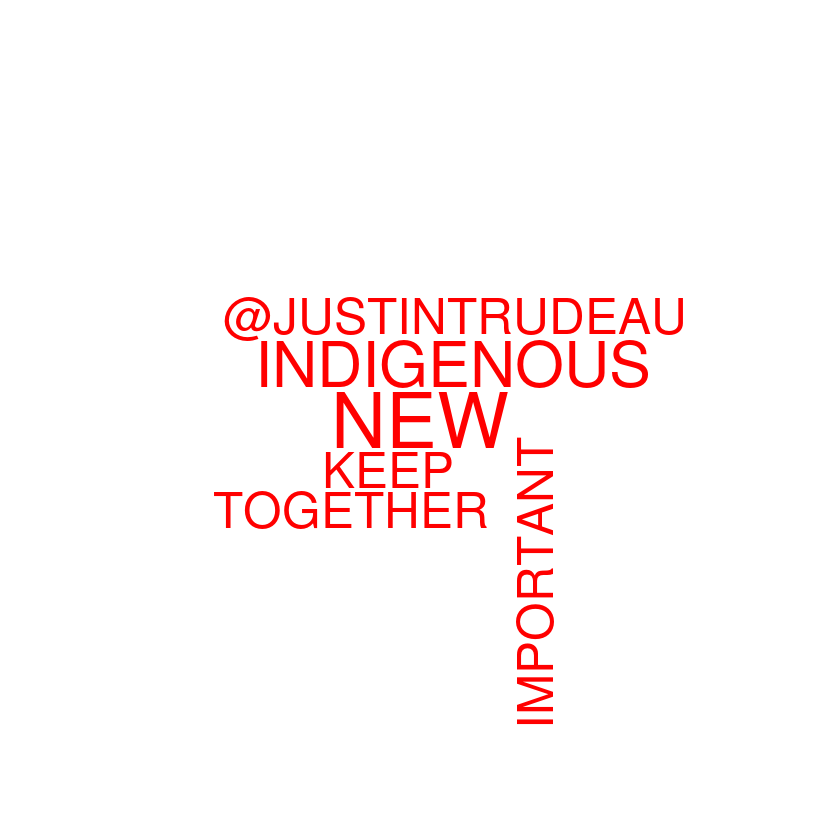

In [8]:
textplot_wordcloud(tweets.trudeau.tokens.dfm, color=c("red"), max_words=100)

Warning message in max(freq):
“no non-missing arguments to max; returning -Inf”

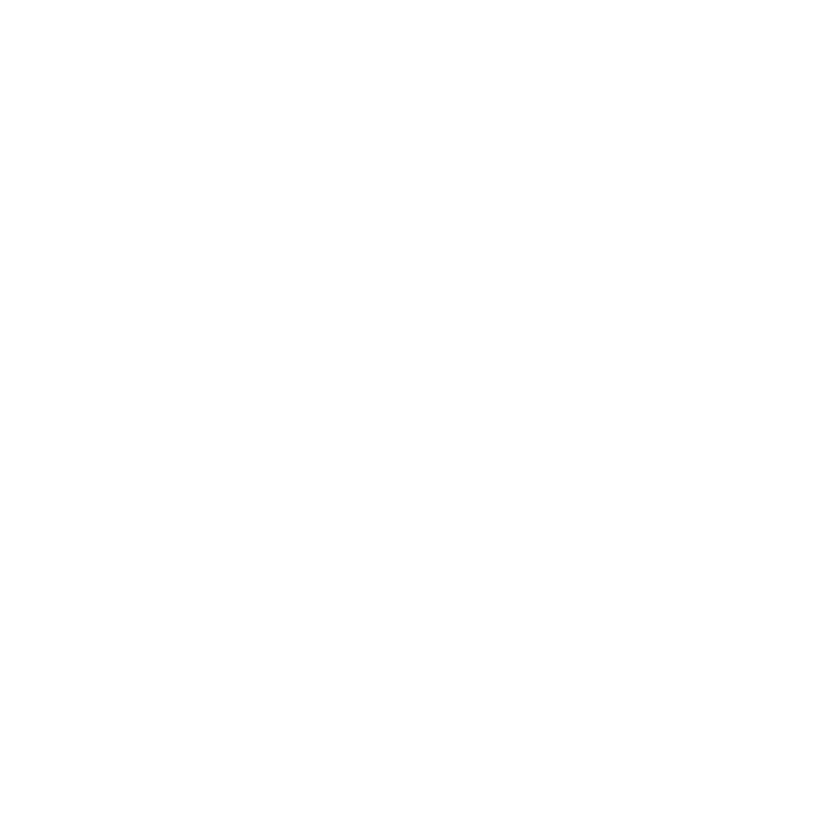

In [9]:
textplot_wordcloud(tweets.scheer.tokens.dfm, color=c("blue"), max_words=100)

Warning message in max(freq):
“no non-missing arguments to max; returning -Inf”

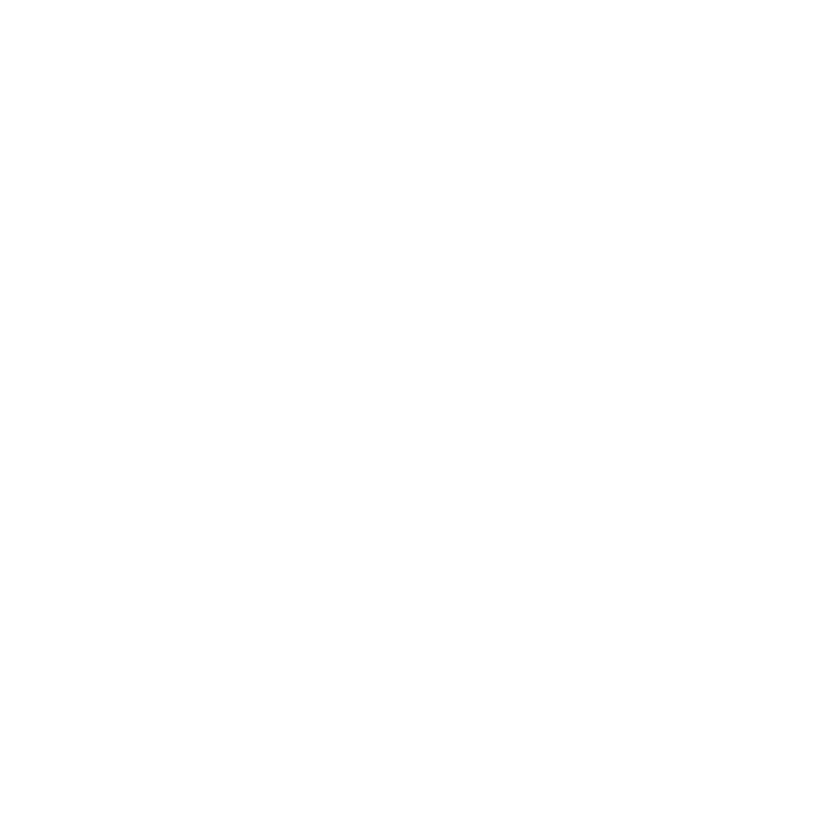

In [10]:
textplot_wordcloud(tweets.bernier.tokens.dfm, color=c("purple"), max_words=100)

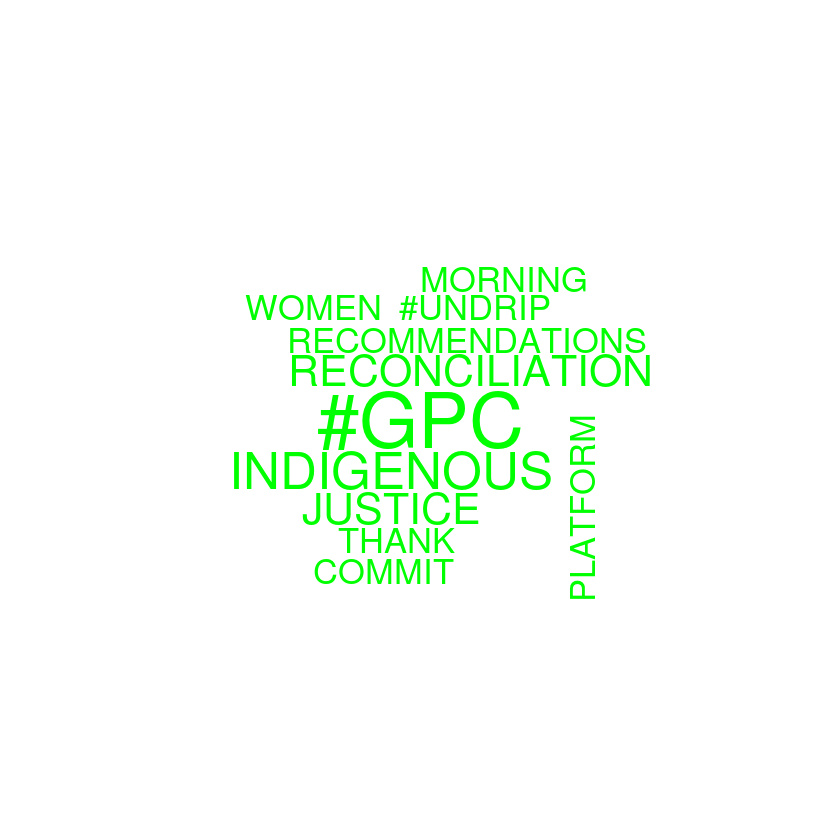

In [11]:
textplot_wordcloud(tweets.may.tokens.dfm, color=c("green"), max_words=100)

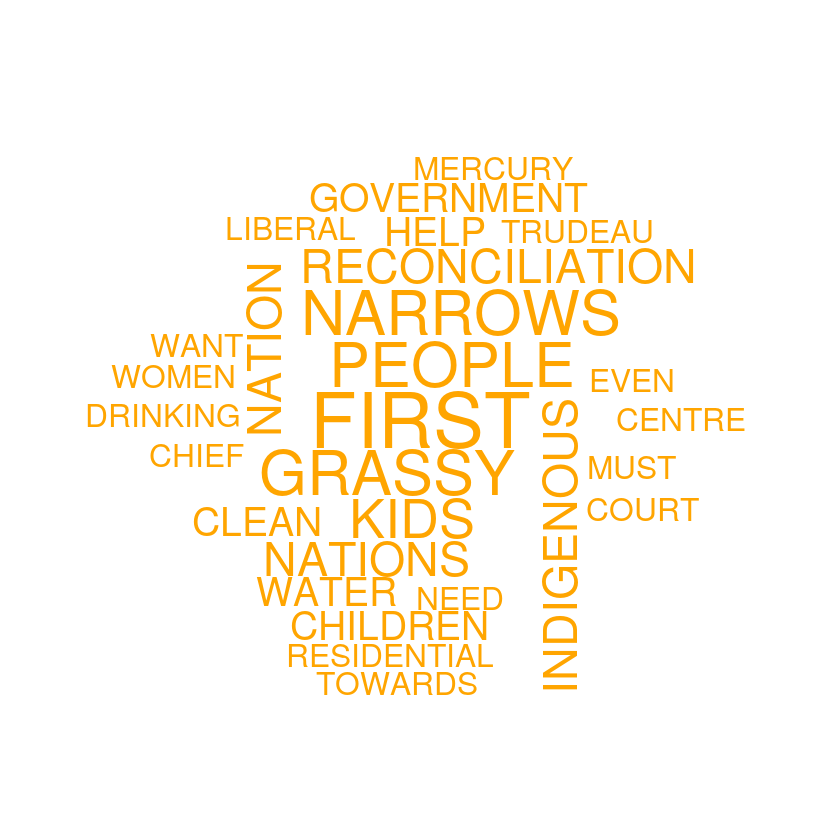

In [12]:
ss <- textplot_wordcloud(tweets.singh.tokens.dfm, color=c("orange"), max_words=100)